# Home Credit Default Risk

By Daffa Muhamad Azhar

In [2]:
# Menyambungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root = '/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/Home Credit/'

## Import Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# tabel setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
app_train = pd.read_csv(root + 'application_train.csv')
bureau = pd.read_csv(root + 'bureau.csv')
pos_cash_balance = pd.read_csv(root + 'POS_CASH_balance.csv')
previous_application = pd.read_csv(root + 'previous_application.csv')

## Exploratory Data Analysis

### Application Train

Melihat data dari application_train

In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
print('Jumlah baris : ', app_train.shape[0], 'data')
print('Jumlah kolom : ', app_train.shape[1], 'kolom')

Jumlah baris :  307511 data
Jumlah kolom :  122 kolom


In [9]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
app_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Melakukan pemeriksaan data

In [11]:
# Cek Missing Data
total_missing = app_train.isnull().sum().sort_values(ascending=False)
percent_1 = app_train.isnull().sum()/app_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,COMMONAREA_MEDI,214865,69.9
1,COMMONAREA_AVG,214865,69.9
2,COMMONAREA_MODE,214865,69.9
3,NONLIVINGAPARTMENTS_MODE,213514,69.4
4,NONLIVINGAPARTMENTS_AVG,213514,69.4
5,NONLIVINGAPARTMENTS_MEDI,213514,69.4
6,FONDKAPREMONT_MODE,210295,68.4
7,LIVINGAPARTMENTS_MODE,210199,68.4
8,LIVINGAPARTMENTS_AVG,210199,68.4
9,LIVINGAPARTMENTS_MEDI,210199,68.4


Terdapat banyak kolom yang memiliki persentase missing value yang sangat tinggi. Kolom tersebut dapat di-drop ataupun dilakukan imputing saat dilakukan pre-proses data.

Kemudian melakukan pengecekan TARGET

In [12]:
app_target = pd.DataFrame(app_train.groupby('TARGET').size(), columns=['Count'])
app_target = app_target.sort_values(by=['Count'], ascending=False)
app_target = app_target.reset_index().rename(columns={'index': 'TARGET'})
app_target

,TARGET,Count
0,0,282686
1,1,24825


Terdapat 282.686 data dengan TARGET 0 atau Pemohon dapat membayar pinjamannya dan 24.825 data dengan TARGET 1 atau Pemohon akan gagal bayar atau berkendala saat pembayaran.

In [13]:
fig = px.pie(app_train, names='TARGET',)
fig.update_layout(title='Persentase dari TARGET')
fig.show()

Dilihat dari Pie Chart diatas, TARGET sangat tidak seimbang. Beberapa pendekatan yang dapat dilakukan yaitu oversampling (menaikkan data dengan TARGET 0) dan undersampling (memangkas data dengan TARGET 1).

In [14]:
kolom_1 = [
    'CODE_GENDER',
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
]

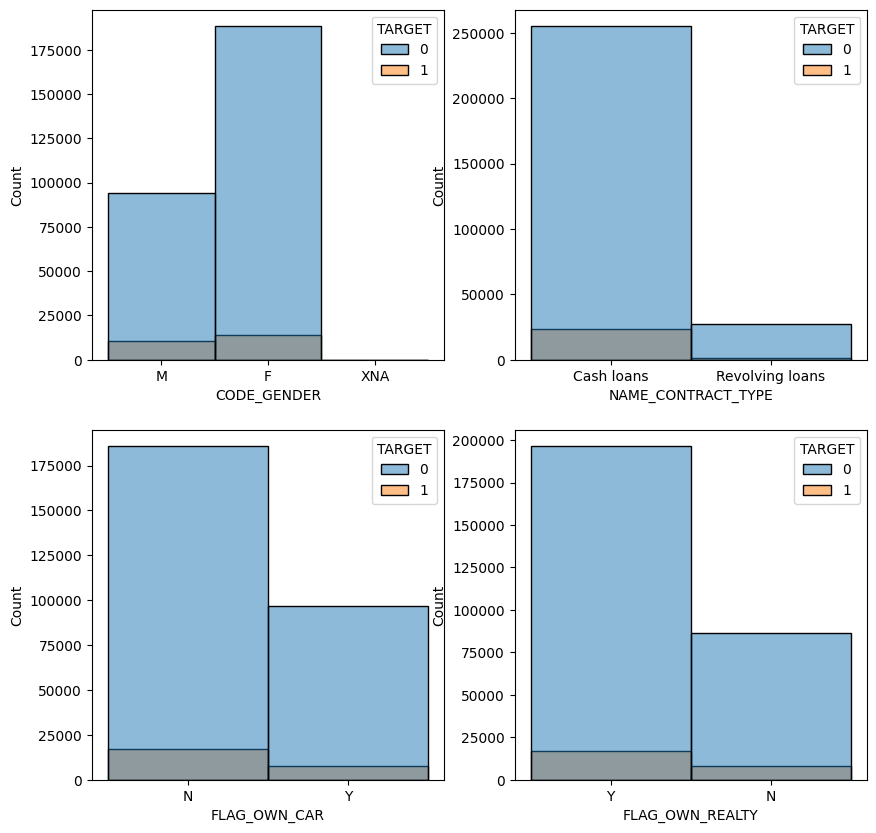

In [15]:
y = 2
x = 2
fig, ax = plt.subplots(y, x, figsize = (10,10))

i = 0
j = 0
for col in kolom_1:
  plot = sns.histplot(data=app_train, x=col, hue="TARGET", ax=ax[j][i])
  if i == x-1:
    i = 0
    j += 1
  else:
    i += 1

Terdapat anomali pada Gender yaitu terdapat Value XNA.

In [16]:
kolom_2 = [
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'OCCUPATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_TYPE_SUITE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'NAME_EDUCATION_TYPE',
]

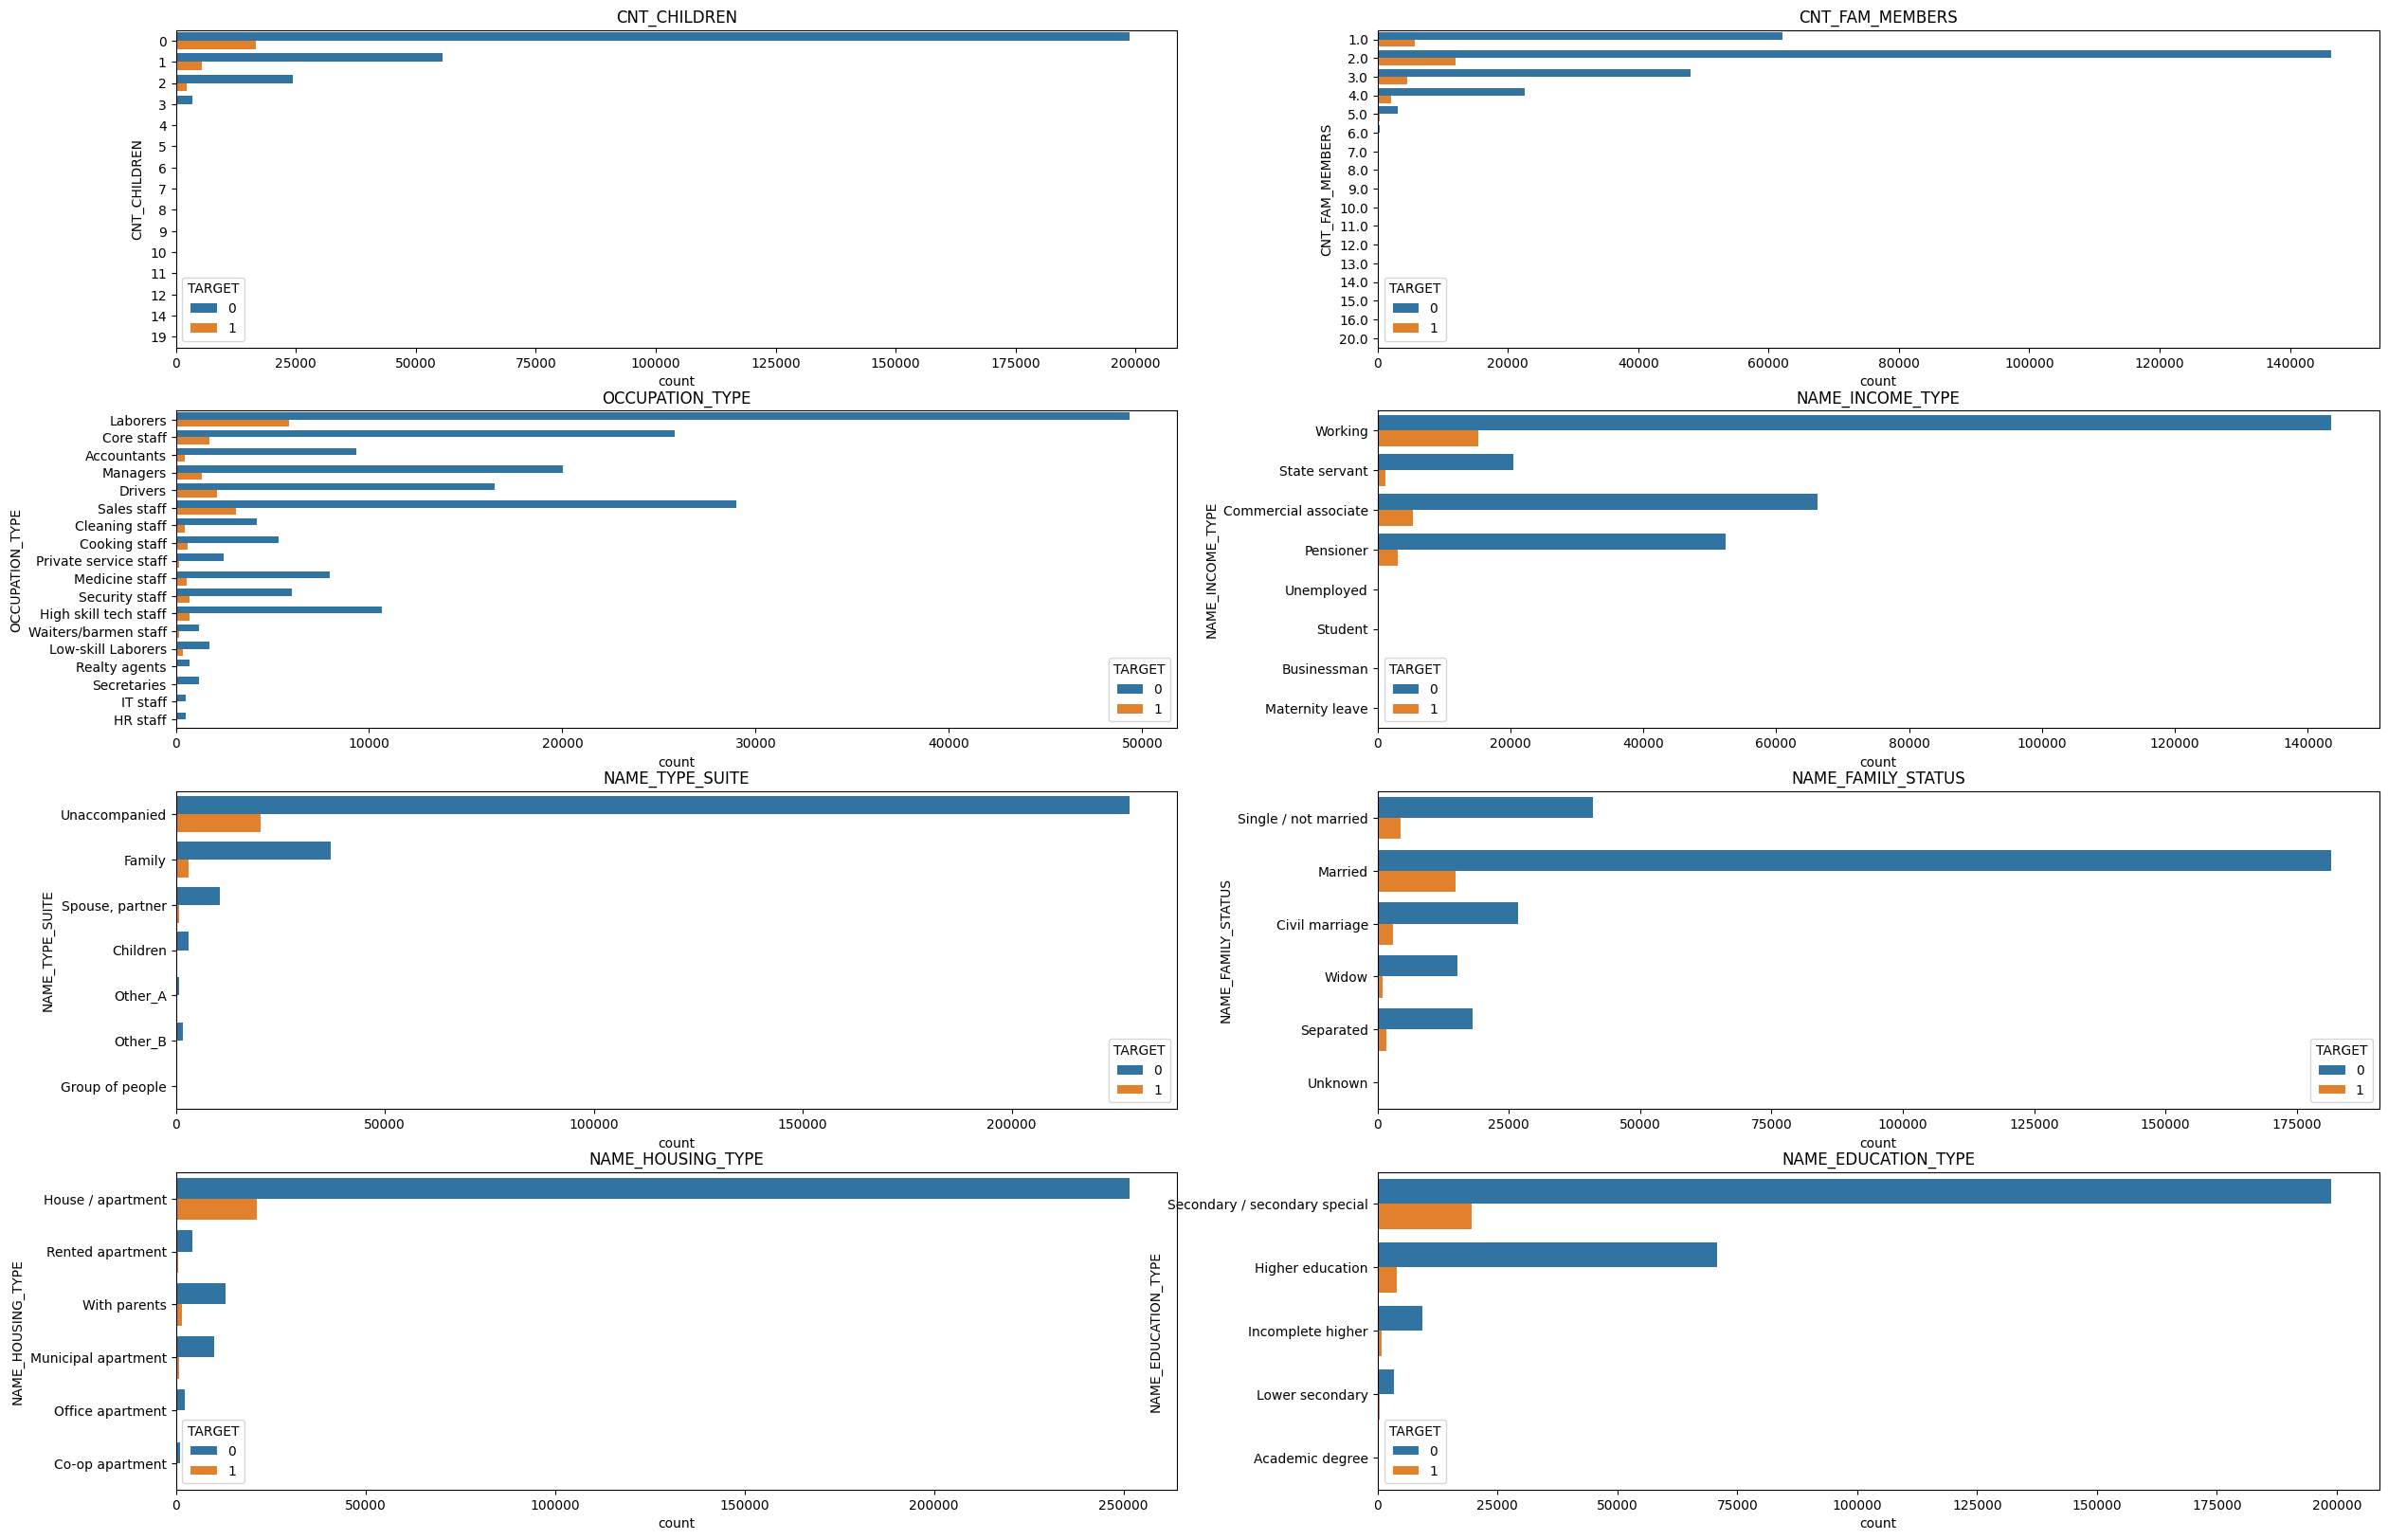

In [17]:
y = 4
x = 2
fig, ax = plt.subplots(y, x, figsize = (30,20))

i = 0
j = 0
for col in kolom_2:
  plot = sns.countplot(data=app_train, y=col, hue="TARGET", ax=ax[j][i])
  ax[j][i].title.set_text(col)
  if i == x-1:
    i = 0
    j += 1
  else:
    i += 1

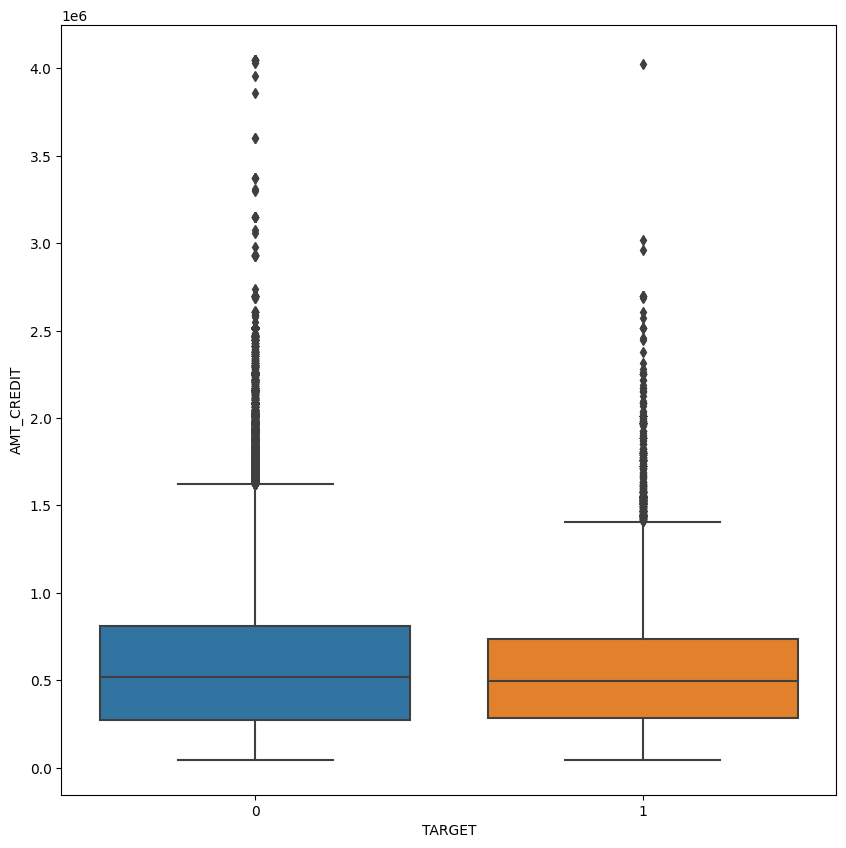

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

sns.boxplot(data=app_train, x='TARGET', y='AMT_CREDIT', ax=ax)
plt.show()

Melihat AMT_CREDIT dari beberapa sisi

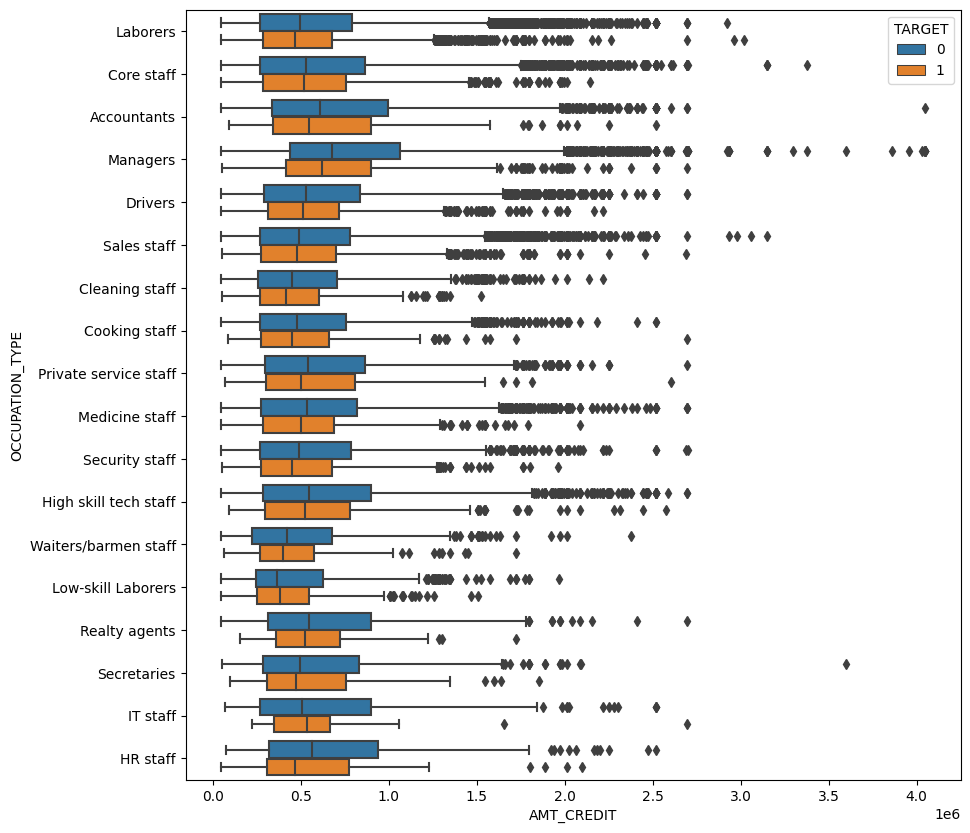

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

sns.boxplot(data=app_train, x='AMT_CREDIT', y='OCCUPATION_TYPE', hue='TARGET', ax=ax)
plt.show()

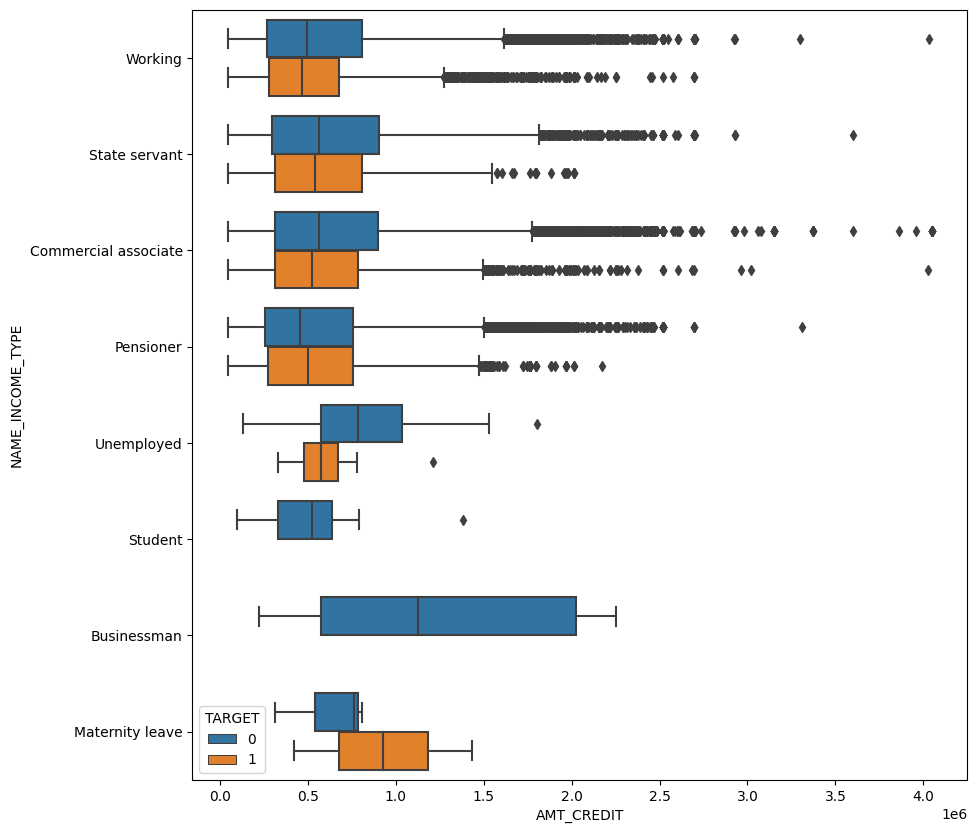

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

sns.boxplot(data=app_train, x='AMT_CREDIT', y='NAME_INCOME_TYPE', hue='TARGET', ax=ax)
plt.show()

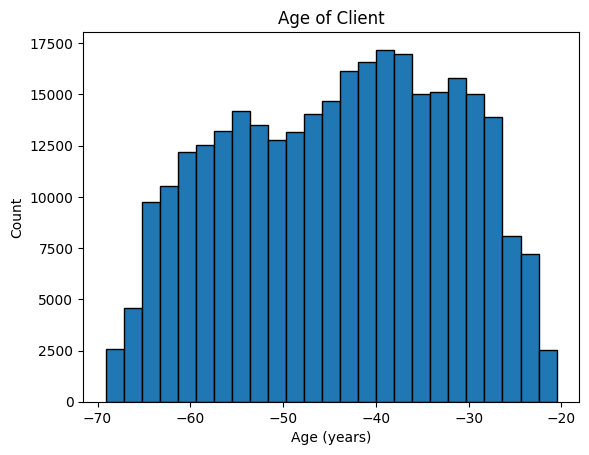

In [21]:
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Usia pada data bernilai negatif maka harus dilakukan perbaikan. Dan pemohon paling banyak adalah pada usia 40 tahun. 

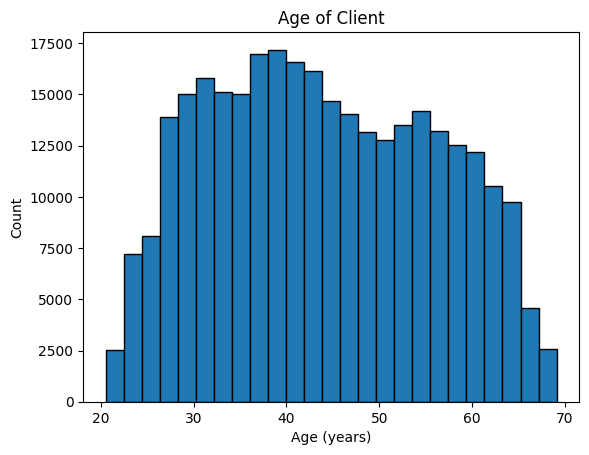

In [22]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

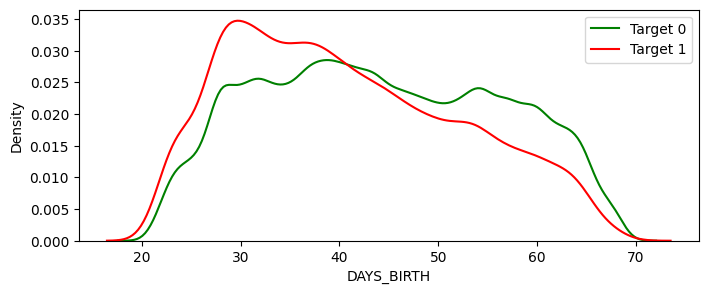

In [23]:
plt.figure(figsize=(8,3))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label="Target 0", color='green')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label="Target 1", color='red')
plt.legend()
plt.show()

Setelah dilakukan perbaikan, dapat dilihat bahwa pemohon terbanyak berada diusia 30 hingga 40 tahun.

Dapat dilihat pada `app_train.describe()`, terdapat pemohon yang memiliki waktu bekerja selama 365.243 hari (1000 tahun) dan tidak bernilai negatif seperti data yang lainnya.

In [24]:
app_train[app_train['DAYS_EMPLOYED'] == 365243].DAYS_EMPLOYED.count()

55374

Terdapat 55.374 data pemohon dengan total hari kerja 1000 tahun. 

Untuk kasus ini akan dilakukan imputing untuk data hari kerja yang anomali dengan rata - rata hari kerja jika data yang anomali tidak ada.

In [25]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].apply(lambda x: non_anom['DAYS_EMPLOYED'].mean() if x == 365243 else x)

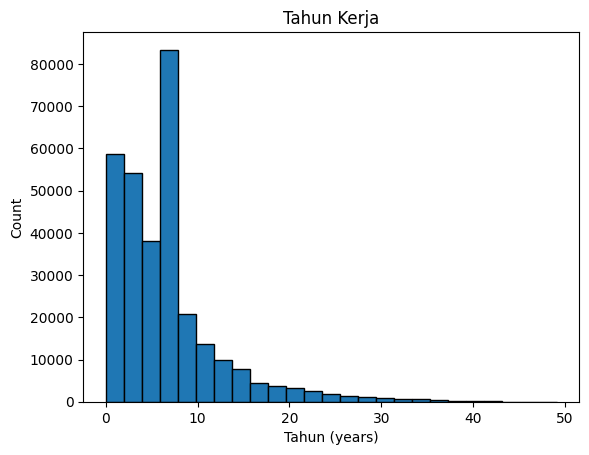

In [26]:
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
plt.hist(app_train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('Tahun Kerja'); plt.xlabel('Tahun (years)'); plt.ylabel('Count');

Persebaran data tidak akan tepat karena 55.374 data diimput dengan rata - rata.

Nilai density dari external source

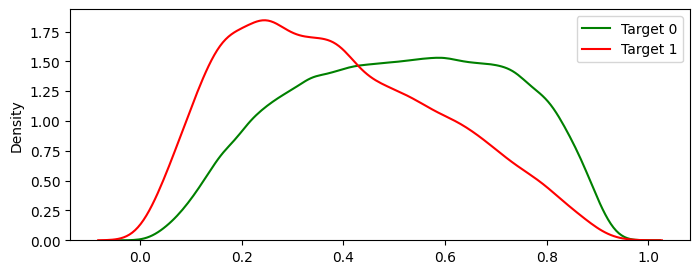

In [27]:
target_0_ext_source_1 = app_train[app_train['TARGET'] == 0]['EXT_SOURCE_1'].values
target_1_ext_source_1 = app_train[app_train['TARGET'] == 1]['EXT_SOURCE_1'].values

plt.figure(figsize=(8,3))
sns.kdeplot(target_0_ext_source_1, label="Target 0", color='green')
sns.kdeplot(target_1_ext_source_1, label="Target 1", color='red')
plt.legend()
plt.show()

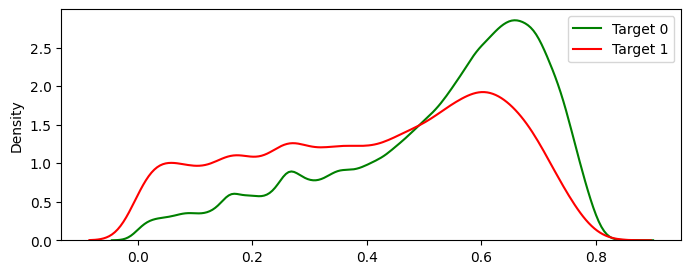

In [28]:
target_0_ext_source_1 = app_train[app_train['TARGET'] == 0]['EXT_SOURCE_2'].values
target_1_ext_source_1 = app_train[app_train['TARGET'] == 1]['EXT_SOURCE_2'].values

plt.figure(figsize=(8,3))
sns.kdeplot(target_0_ext_source_1, label="Target 0", color='green')
sns.kdeplot(target_1_ext_source_1, label="Target 1", color='red')
plt.legend()
plt.show()

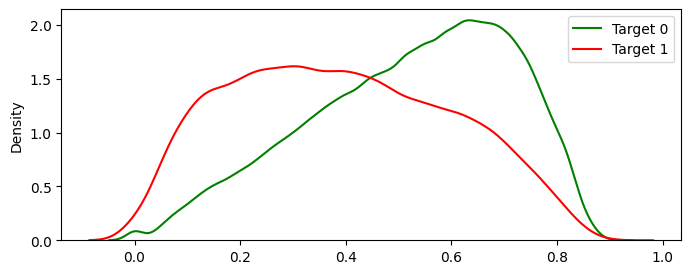

In [29]:
target_0_ext_source_1 = app_train[app_train['TARGET'] == 0]['EXT_SOURCE_3'].values
target_1_ext_source_1 = app_train[app_train['TARGET'] == 1]['EXT_SOURCE_3'].values

plt.figure(figsize=(8,3))
sns.kdeplot(target_0_ext_source_1, label="Target 0", color='green')
sns.kdeplot(target_1_ext_source_1, label="Target 1", color='red')
plt.legend()
plt.show()

### Bureau

In [30]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [31]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [32]:
print('Jumlah baris : ', bureau.shape[0], 'data')
print('Jumlah kolom : ', bureau.shape[1], 'kolom')

Jumlah baris :  1716428 data
Jumlah kolom :  17 kolom


In [33]:
num = bureau.select_dtypes(include="number").columns.tolist() # memisahkan kolom numerik
cat = bureau.select_dtypes(include="object").columns.tolist() # memishakan kolom kategorik

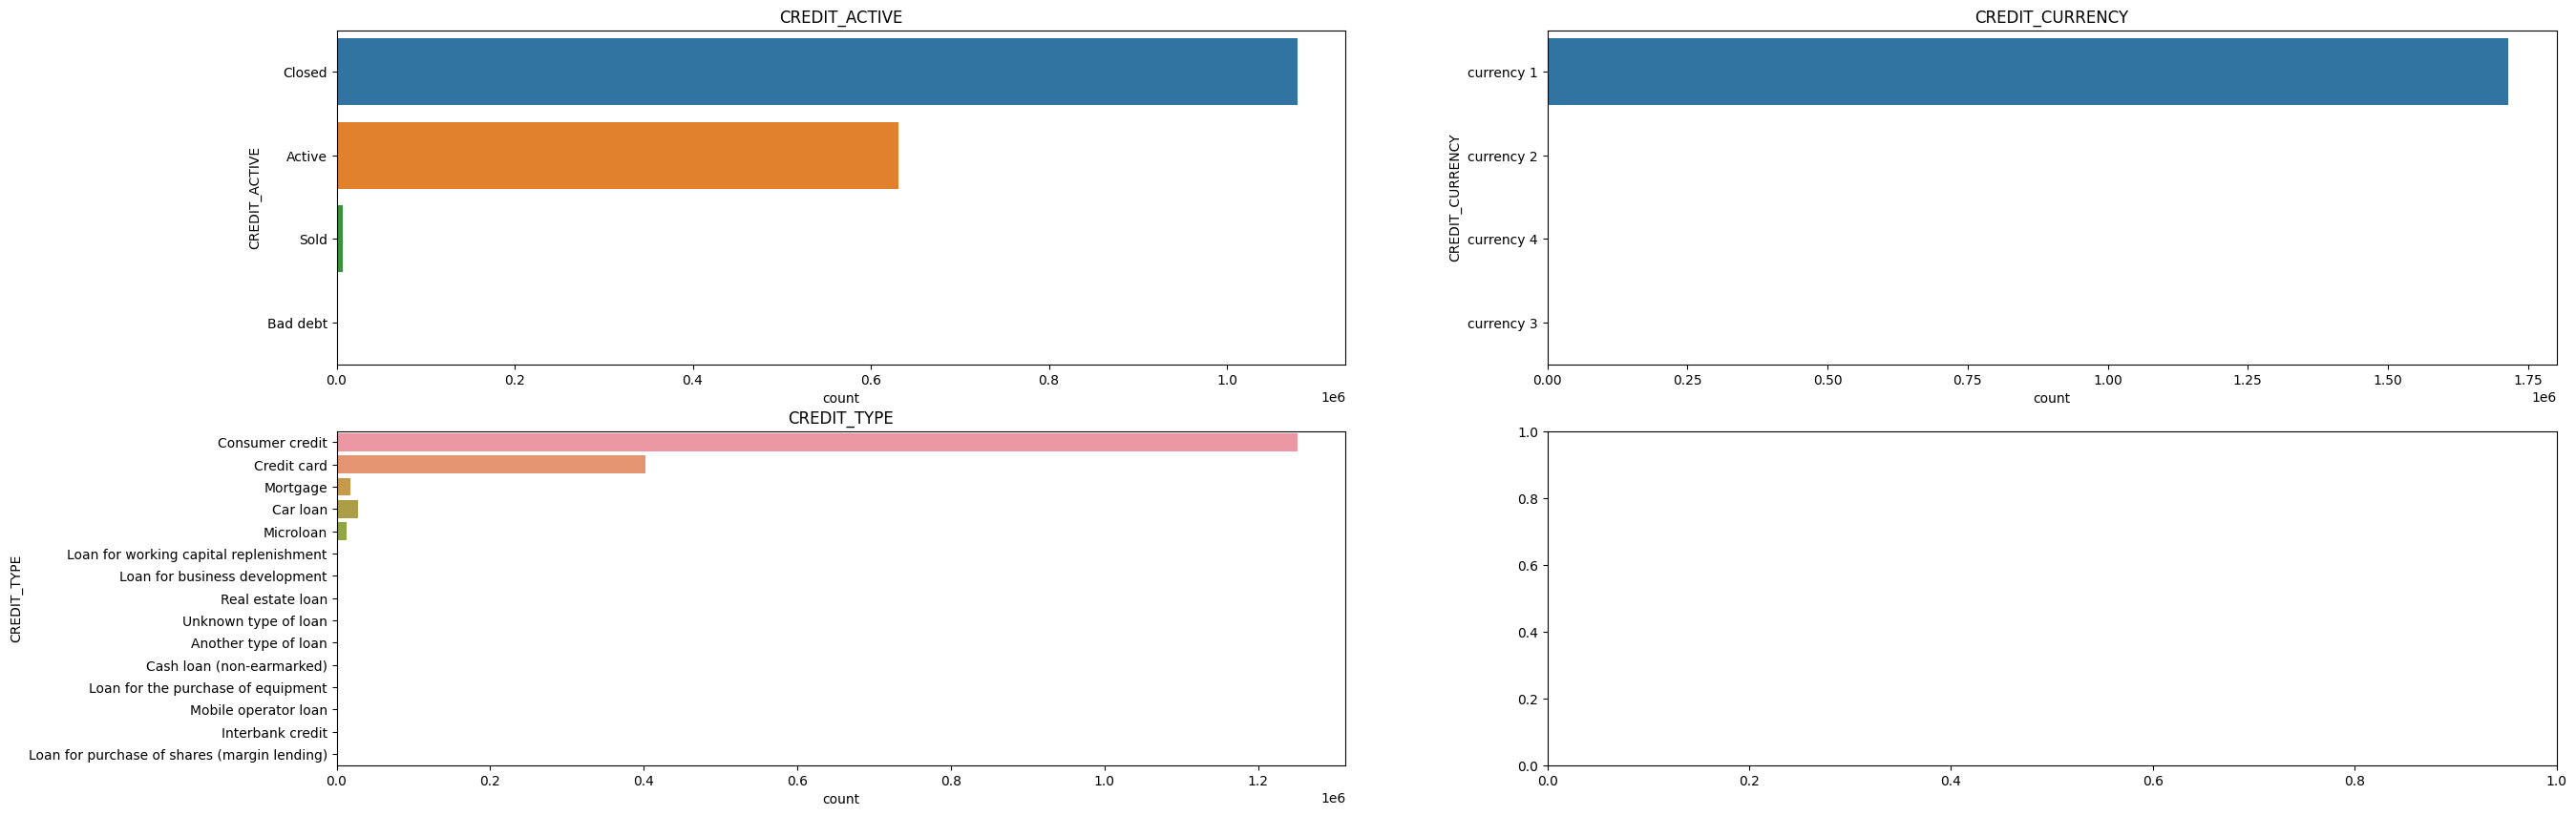

In [34]:
bureau_categoric = bureau.loc[:, cat]

y = 2
x = 2
fig, ax = plt.subplots(y, x, figsize = (30,10))

i = 0
j = 0
for col in bureau_categoric:
  plot = sns.countplot(data=bureau, y=col, ax=ax[j][i])
  ax[j][i].title.set_text(col)
  if i == x-1:
    i = 0
    j += 1
  else:
    i += 1

In [35]:
bureau[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08


In [36]:
bureau[cat].describe().T

,count,unique,top,freq
CREDIT_ACTIVE,1716428,4,Closed,1079273
CREDIT_CURRENCY,1716428,4,currency 1,1715020
CREDIT_TYPE,1716428,15,Consumer credit,1251615


### Previous Application

In [37]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [39]:
print('Jumlah baris : ', previous_application.shape[0], 'data')
print('Jumlah kolom : ', previous_application.shape[1], 'kolom')

Jumlah baris :  1670214 data
Jumlah kolom :  37 kolom


In [40]:
num = previous_application.select_dtypes(include="number").columns.tolist() # memisahkan kolom numerik
cat = previous_application.select_dtypes(include="object").columns.tolist() # memishakan kolom kategori

In [41]:
cat.remove('FLAG_LAST_APPL_PER_CONTRACT')
cat

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

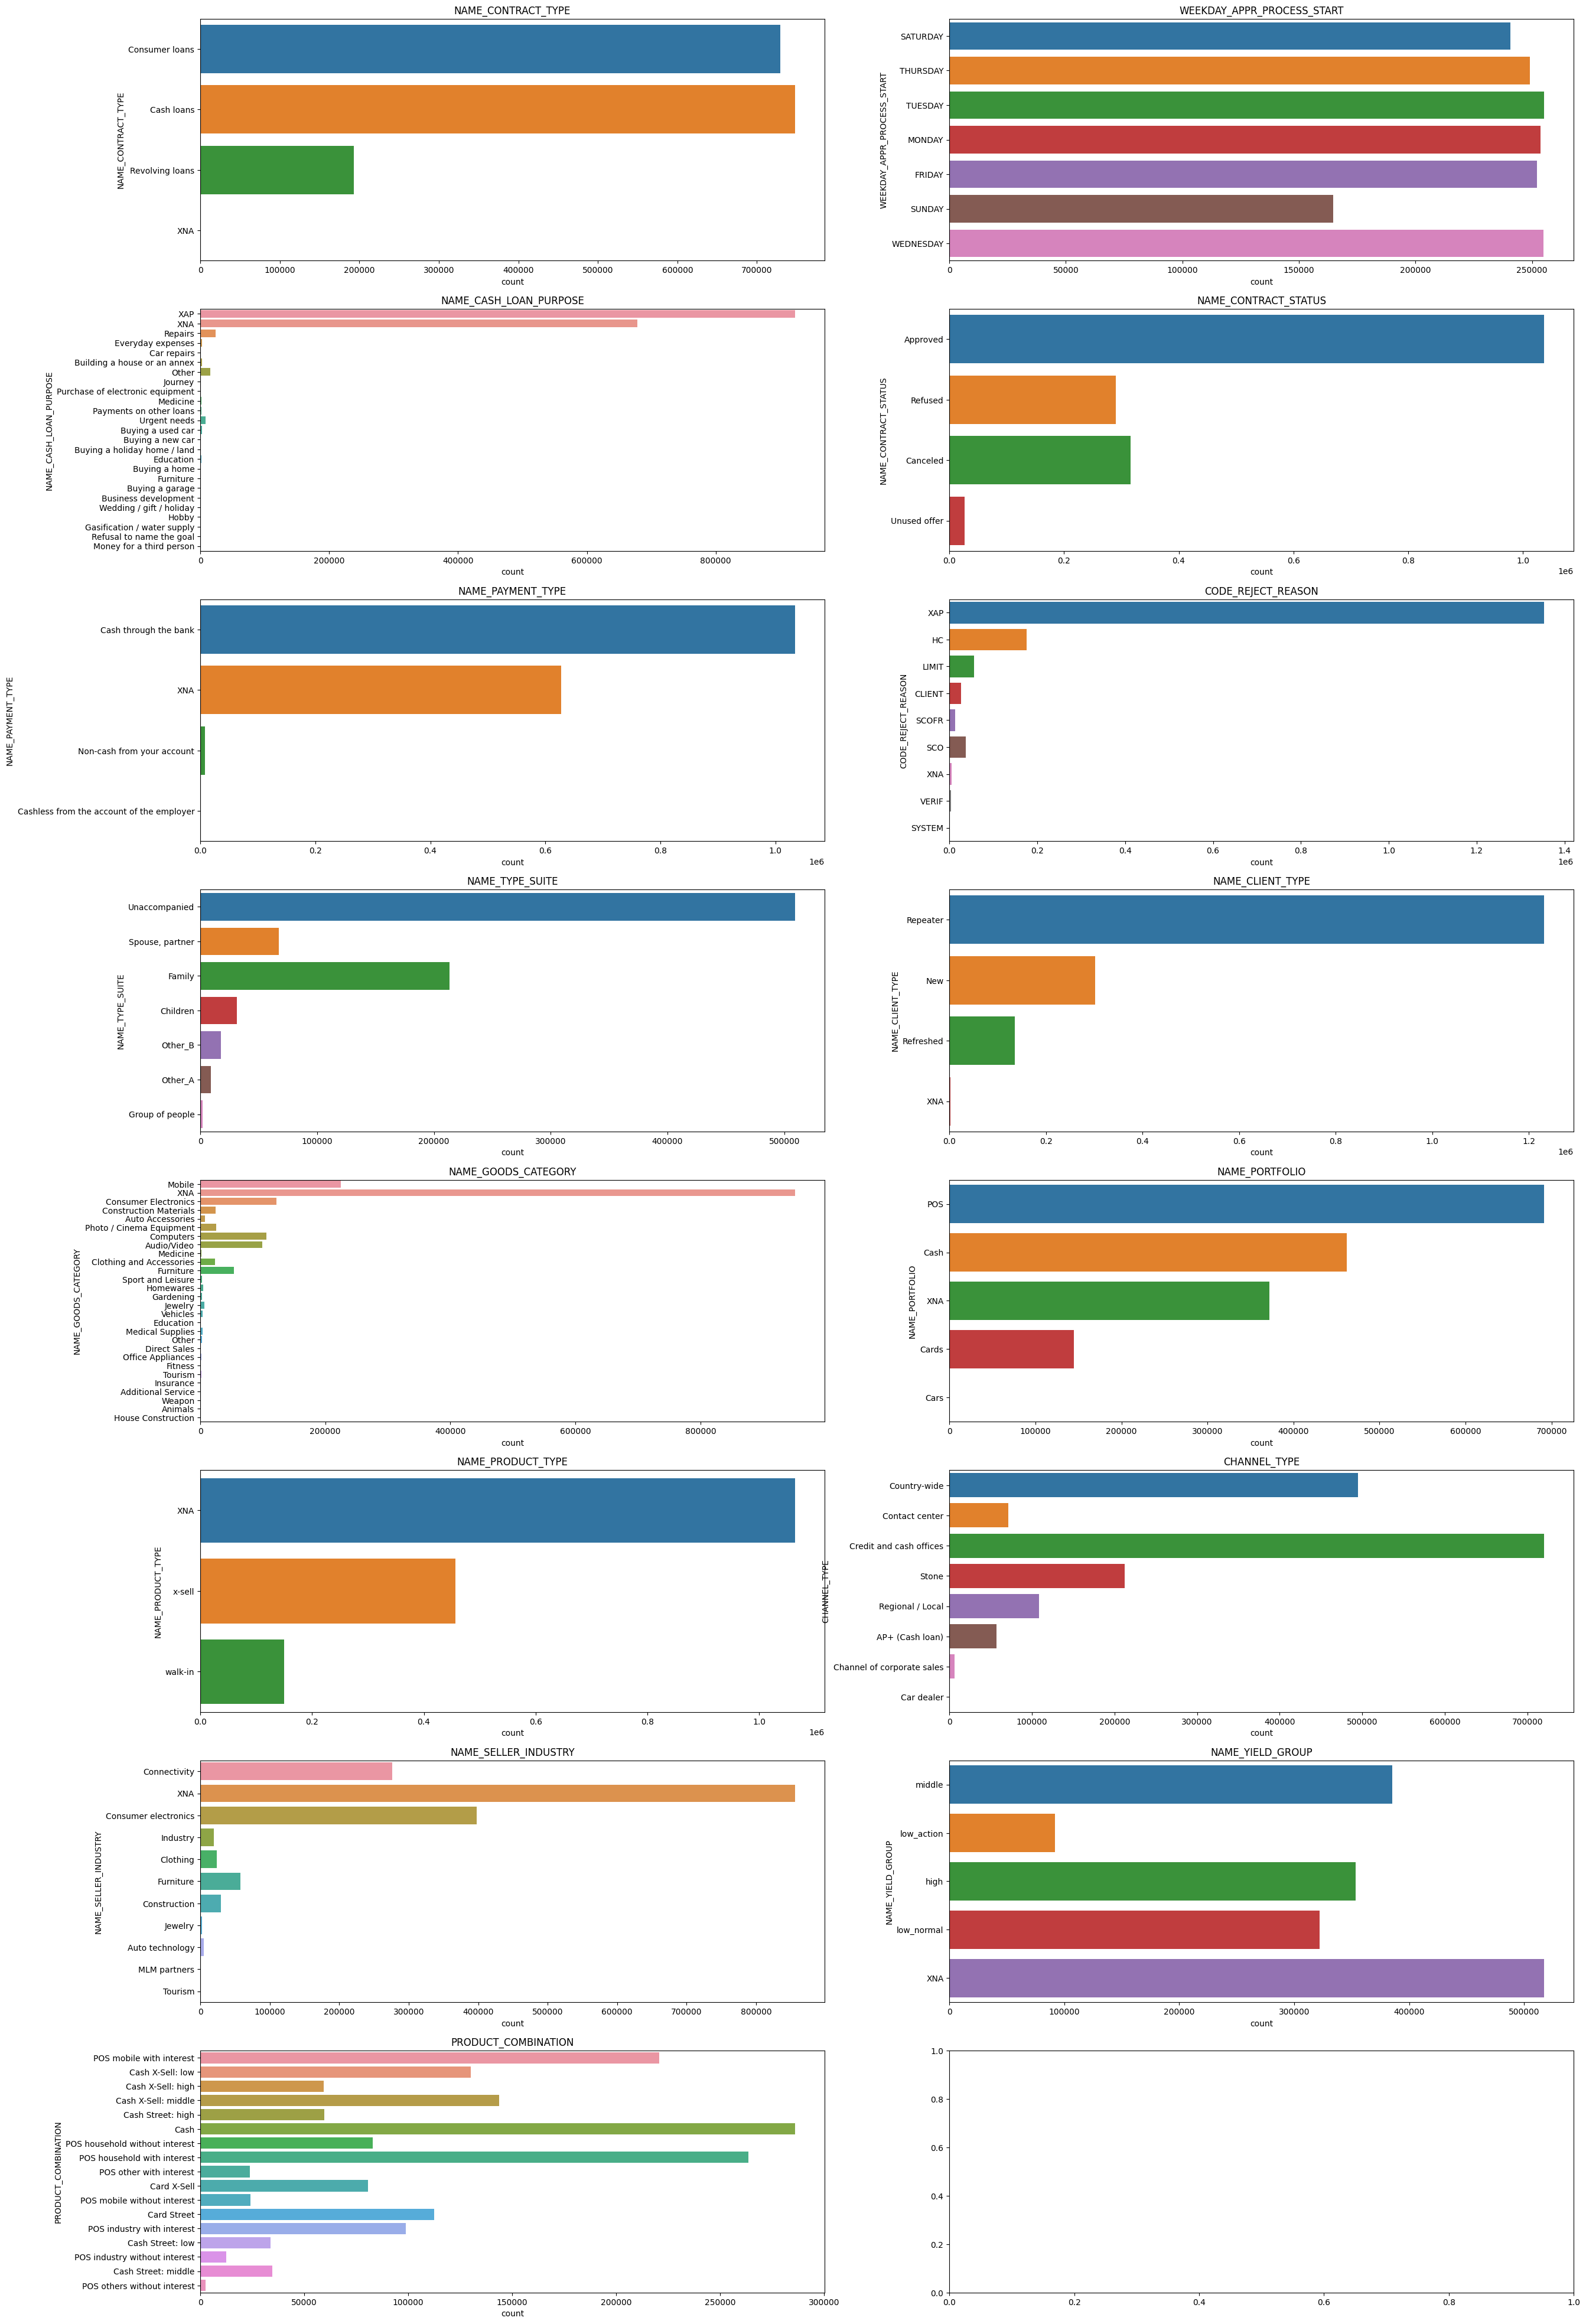

In [42]:
y = 8
x = 2
fig, ax = plt.subplots(y, x, figsize = (30,50))

i = 0
j = 0
for col in cat:
  plot = sns.countplot(data=previous_application, y=col, ax=ax[j][i])
  ax[j][i].title.set_text(col)
  if i == x-1:
    i = 0
    j += 1
  else:
    i += 1

In [43]:
previous_application[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762386,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616547,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [44]:
previous_application[cat].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809
NAME_PORTFOLIO,1670214,5,POS,691011


### POS Cash Balance

In [45]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [46]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [47]:
print('Jumlah baris : ', pos_cash_balance.shape[0], 'data')
print('Jumlah kolom : ', pos_cash_balance.shape[1], 'kolom')

Jumlah baris :  10001358 data
Jumlah kolom :  8 kolom


In [48]:
num = pos_cash_balance.select_dtypes(include="number").columns.tolist() # memisahkan kolom numerik
cat = pos_cash_balance.select_dtypes(include="object").columns.tolist() # memishakan kolom kategori

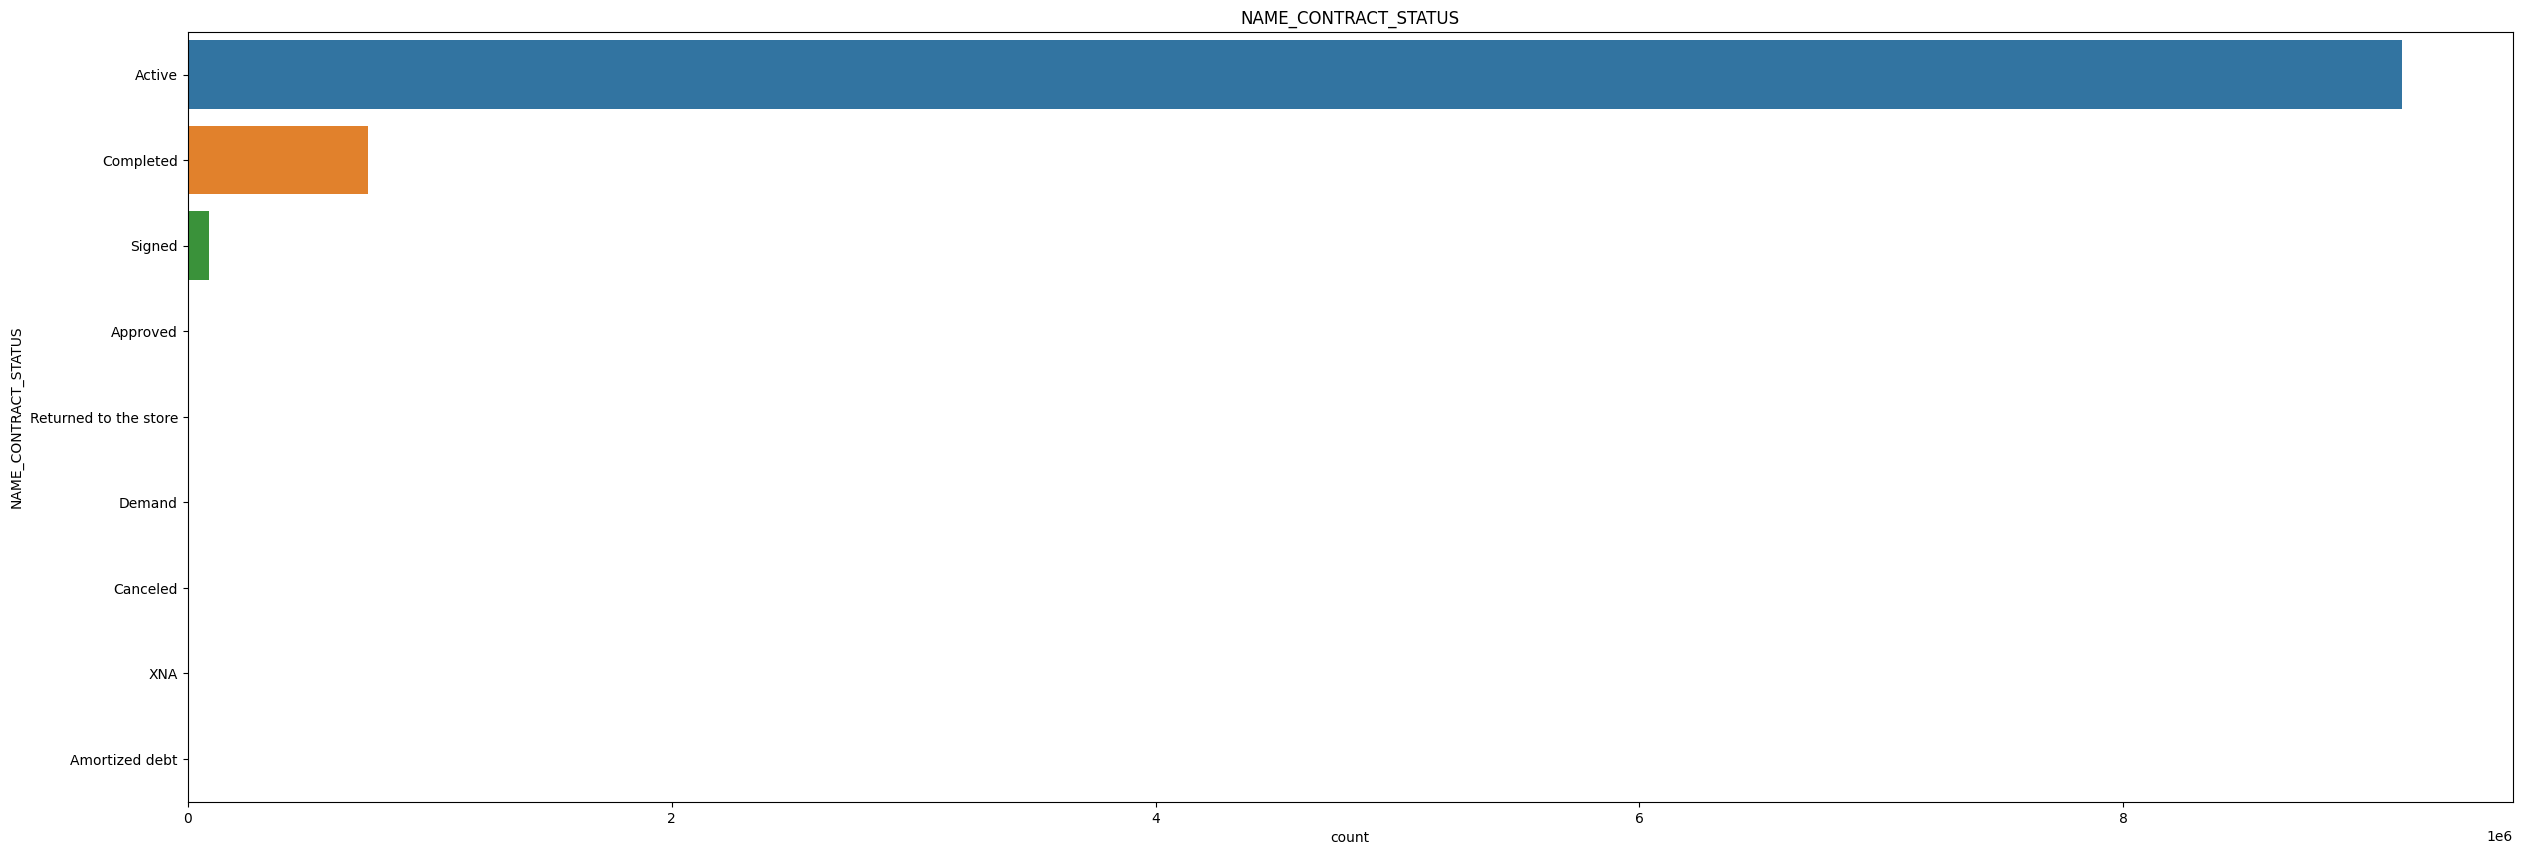

In [49]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (30,10))

i = 0
j = 0
for col in cat:
  plot = sns.countplot(data=pos_cash_balance, y=col, ax=ax)
  ax.title.set_text(col)

In [50]:
pos_cash_balance[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


In [51]:
pos_cash_balance[cat].describe().T

,count,unique,top,freq
NAME_CONTRACT_STATUS,10001358,9,Active,9151119


## Data Preparation

### Handle Missing Value

Mengisi value dengan 0 pada kolom `EXT_SOURCE_1` karena fitur tersebut berisikan nilai dari hasil normalisasi tabel lain sehingga sangat dibutuhkan.

In [52]:
# fillna ext source 1 dengan 0
app_train['EXT_SOURCE_1'] = app_train['EXT_SOURCE_1'].fillna(0)

Melakukan Drop kolom dengan missing value lebih dari 40% karena tidak akan banyak data yang hilang jika melakukan drop kolom ini.

In [53]:
# Drop kolom dengan missing value >40%
app_train = app_train.drop(app_train.columns[app_train.isnull().mean() > 0.40], axis=1)

Drop data dimana `TARGET == 0` dan terdapat nilai `NULL`

In [54]:
# Cek Missing Data
total_missing = app_train.isnull().sum().sort_values(ascending=False)
percent_1 = app_train.isnull().sum()/app_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,OCCUPATION_TYPE,96391,31.3
1,EXT_SOURCE_3,60965,19.8
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
8,NAME_TYPE_SUITE,1292,0.4
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3


In [55]:
# Delete row jika semua value-nya null
app_train = app_train.dropna(how='all')

# drop rows dengan target 0 yang memiliki Null value pada kolom yang memiliki null value.
index = app_train[
    (app_train['TARGET'] == 0) & 
    ( (app_train[missing_data['Column'][0]].isnull()) | 
     (app_train[missing_data['Column'][1]].isnull()) | 
     (app_train[missing_data['Column'][2]].isnull()) |
     (app_train[missing_data['Column'][3]].isnull()) |
     (app_train[missing_data['Column'][4]].isnull()) |
     (app_train[missing_data['Column'][5]].isnull()) |
     (app_train[missing_data['Column'][6]].isnull()) |
     (app_train[missing_data['Column'][7]].isnull())
     )].index
app_train = app_train.drop(index)

Hapus data dengan gender XNA

In [56]:
# XNA pada Gender Code
app_train[app_train['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,13717,2797.0,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.00000,0.709205,0.310818,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,10647,1228.0,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.40497,0.659185,0.076984,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


Berhubung kedua data tersebut memiliki TARGET 0 maka drop dilakukan ke seluruh data tersebut.

In [57]:
# Drop rows dengan gender XNA
app_train = app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index, axis=0)

Melakukan Imputing kepada sisa kolom yang terdapat missing value

In [58]:
# Generate data untuk Count Family Members
app_train['CNT_FAM_MEMBERS'] = app_train['CNT_FAM_MEMBERS'].fillna(app_train[app_train['CNT_CHILDREN'] == 0].CNT_FAM_MEMBERS.mode()[0])

In [59]:
# Generate Occupation Type missing value dengan Modus
app_train['OCCUPATION_TYPE'] = app_train['OCCUPATION_TYPE'].fillna(app_train['OCCUPATION_TYPE'].mode()[0])
app_train['NAME_TYPE_SUITE'] = app_train['NAME_TYPE_SUITE'].fillna(app_train['NAME_TYPE_SUITE'].mode()[0])

In [60]:
# fill semua kolom dengan 0
app_train = app_train.fillna(0)

In [61]:
# Cek Missing Data
total_missing = app_train.isnull().sum().sort_values(ascending=False)
percent_1 = app_train.isnull().sum()/app_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,SK_ID_CURR,0,0.0
1,FLAG_DOCUMENT_9,0,0.0
2,FLAG_DOCUMENT_7,0,0.0
3,FLAG_DOCUMENT_6,0,0.0
4,FLAG_DOCUMENT_5,0,0.0
5,FLAG_DOCUMENT_4,0,0.0
6,FLAG_DOCUMENT_3,0,0.0
7,FLAG_DOCUMENT_2,0,0.0
8,DAYS_LAST_PHONE_CHANGE,0,0.0
9,DEF_60_CNT_SOCIAL_CIRCLE,0,0.0


In [62]:
app_train.shape

(179793, 74)

### Feature Engineering

Ketika data pada tabel utama sudah bersih, maka dilakukan feature engineering untuk menambah fitur baik dari tabel lain maupun dari tabel sendiri.

#### Menambahkan fitur yang diduga dapat meningkatkan kinerja model

In [63]:
# New Feature Percentage
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [64]:
# replace infinite
app_train.replace([np.inf, -np.inf], 0, inplace=True)

In [65]:
# Drop Kolom FLAG DOCUMENTS yang persebaran data sangat imbalance
app_train = app_train.drop([
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
], axis=1)

In [66]:
app_train.shape

(179793, 59)

#### Menambahkan fitur dari data Bureau

Total peminjaman yang terdapat pada biro kredit

In [67]:
prev_loans = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREV_LOANS'})
prev_loans.head()

,SK_ID_CURR,PREV_LOANS
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [68]:
# jika tidak pernah meminjam sebelumnya
prev_loans['PREV_LOANS'] = prev_loans['PREV_LOANS'].fillna(0)

Total tipe kredit yang pernah dilakukan oleh pemohon

In [69]:
# Total Credit Types setiap nasabah
credit_types_per_customer = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()
credit_types_per_customer = credit_types_per_customer.reset_index().rename(columns={'CREDIT_TYPE':'PREV_TOTAL_CREDIT_TYPES'})
credit_types_per_customer.head()

,SK_ID_CURR,PREV_TOTAL_CREDIT_TYPES
0,100001,1
1,100002,2
2,100003,2
3,100004,1
4,100005,2


In [70]:
# merge
prev_loans = prev_loans.merge(credit_types_per_customer, on = 'SK_ID_CURR', how = 'left')
prev_loans.head()

,SK_ID_CURR,PREV_LOANS,PREV_TOTAL_CREDIT_TYPES
0,100001,7,1
1,100002,8,2
2,100003,4,2
3,100004,2,1
4,100005,3,2


Menambahkan rata - rata jumlah tipe peminjaman

In [71]:
prev_loans['PREV_AVG_LOAN_TYPE'] = prev_loans['PREV_LOANS']/prev_loans['PREV_TOTAL_CREDIT_TYPES']
prev_loans.head()

,SK_ID_CURR,PREV_LOANS,PREV_TOTAL_CREDIT_TYPES,PREV_AVG_LOAN_TYPE
0,100001,7,1,7.0
1,100002,8,2,4.0
2,100003,4,2,2.0
3,100004,2,1,2.0
4,100005,3,2,1.5


Menambahkan modus dari tipe peminjaman sebelumnya

In [72]:
import scipy

# Modus dari prev Credit Types
mode_type = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].agg(lambda x:scipy.stats.mode(x)[0]).str[0]
mode_type = mode_type.reset_index().rename(columns={'CREDIT_TYPE':'PREV_CREDIT_TYPE_MODE'})
# mode_type['PREV_CREDIT_TYPE_MODE'] = mode_type['PREV_CREDIT_TYPE_MODE'].apply(lambda x: x[0] if type(x) == 'list' else x)
mode_type.head()

<ipython-input-72-19174900fd5a>:4: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

<ipython-input-72-19174900fd5a>:4: DeprecationWarning:

Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.



,SK_ID_CURR,PREV_CREDIT_TYPE_MODE
0,100001,Consumer credit
1,100002,Credit card
2,100003,Consumer credit
3,100004,Consumer credit
4,100005,Consumer credit


In [73]:
# Merge
prev_loans = prev_loans.merge(mode_type, on = 'SK_ID_CURR', how = 'left')
prev_loans.head()

,SK_ID_CURR,PREV_LOANS,PREV_TOTAL_CREDIT_TYPES,PREV_AVG_LOAN_TYPE,PREV_CREDIT_TYPE_MODE
0,100001,7,1,7.0,Consumer credit
1,100002,8,2,4.0,Credit card
2,100003,4,2,2.0,Consumer credit
3,100004,2,1,2.0,Consumer credit
4,100005,3,2,1.5,Consumer credit


Menambahkan jumlah setiap `ACTIVE_CREDIT` menjadi fitur

In [74]:
# Total Prev Closed Credit
index = bureau[
    (bureau['CREDIT_ACTIVE'] == 'Active') |
    (bureau['CREDIT_ACTIVE'] == 'Sold') |
    (bureau['CREDIT_ACTIVE'] == 'Bad debt')
].index

closed_credit = bureau.drop(index)

In [75]:
closed_credit = closed_credit[['SK_ID_CURR','CREDIT_ACTIVE']].groupby(by=['SK_ID_CURR'])['CREDIT_ACTIVE'].count()
closed_credit = closed_credit.reset_index().rename(columns={'CREDIT_ACTIVE':'PREV_CREDIT_CLOSED'})
closed_credit.head()

,SK_ID_CURR,PREV_CREDIT_CLOSED
0,100001,4
1,100002,6
2,100003,3
3,100004,2
4,100005,1


In [76]:
# Total Prev Active Credit
index = bureau[
    (bureau['CREDIT_ACTIVE'] == 'Closed') |
    (bureau['CREDIT_ACTIVE'] == 'Sold') |
    (bureau['CREDIT_ACTIVE'] == 'Bad debt')
].index

active_credit = bureau.drop(index)

In [77]:
active_credit = active_credit[['SK_ID_CURR','CREDIT_ACTIVE']].groupby(by=['SK_ID_CURR'])['CREDIT_ACTIVE'].count()
active_credit = active_credit.reset_index().rename(columns={'CREDIT_ACTIVE':'PREV_CREDIT_ACTIVE'})
active_credit.head()

,SK_ID_CURR,PREV_CREDIT_ACTIVE
0,100001,3
1,100002,2
2,100003,1
3,100005,2
4,100008,1


In [78]:
# Total Prev Sold Credit
index = bureau[
    (bureau['CREDIT_ACTIVE'] == 'Active') |
    (bureau['CREDIT_ACTIVE'] == 'Closed') |
    (bureau['CREDIT_ACTIVE'] == 'Bad debt')
].index

sold_credit = bureau.drop(index)

In [79]:
sold_credit = sold_credit[['SK_ID_CURR','CREDIT_ACTIVE']].groupby(by=['SK_ID_CURR'])['CREDIT_ACTIVE'].count()
sold_credit = sold_credit.reset_index().rename(columns={'CREDIT_ACTIVE':'PREV_CREDIT_SOLD'})
sold_credit.head()

,SK_ID_CURR,PREV_CREDIT_SOLD
0,100039,1
1,100128,1
2,100162,1
3,100170,1
4,100201,1


In [80]:
# Total Prev Bad Debt Credit
index = bureau[
    (bureau['CREDIT_ACTIVE'] == 'Active') |
    (bureau['CREDIT_ACTIVE'] == 'Closed') |
    (bureau['CREDIT_ACTIVE'] == 'Sold')
].index

bd_credit = bureau.drop(index)

In [81]:
bd_credit = bd_credit[['SK_ID_CURR','CREDIT_ACTIVE']].groupby(by=['SK_ID_CURR'])['CREDIT_ACTIVE'].count()
bd_credit = bd_credit.reset_index().rename(columns={'CREDIT_ACTIVE':'PREV_CREDIT_BAD_DEBT'})
bd_credit.head()

,SK_ID_CURR,PREV_CREDIT_BAD_DEBT
0,158069,1
1,163442,1
2,176952,1
3,186360,1
4,207535,1


In [82]:
# Merge
prev_loans = prev_loans.merge(active_credit, on = 'SK_ID_CURR', how = 'left')
prev_loans = prev_loans.merge(closed_credit, on = 'SK_ID_CURR', how = 'left')
prev_loans = prev_loans.merge(sold_credit, on = 'SK_ID_CURR', how = 'left')
prev_loans = prev_loans.merge(bd_credit, on = 'SK_ID_CURR', how = 'left')
prev_loans.head()

,SK_ID_CURR,PREV_LOANS,PREV_TOTAL_CREDIT_TYPES,PREV_AVG_LOAN_TYPE,PREV_CREDIT_TYPE_MODE,PREV_CREDIT_ACTIVE,PREV_CREDIT_CLOSED,PREV_CREDIT_SOLD,PREV_CREDIT_BAD_DEBT
0,100001,7,1,7.0,Consumer credit,3.0,4.0,NaN,NaN
1,100002,8,2,4.0,Credit card,2.0,6.0,NaN,NaN
2,100003,4,2,2.0,Consumer credit,1.0,3.0,NaN,NaN
3,100004,2,1,2.0,Consumer credit,NaN,2.0,NaN,NaN
4,100005,3,2,1.5,Consumer credit,2.0,1.0,NaN,NaN


In [83]:
# isi data yang kosong
prev_loans['PREV_CREDIT_ACTIVE'] = prev_loans['PREV_CREDIT_ACTIVE'].fillna(0)
prev_loans['PREV_CREDIT_CLOSED'] = prev_loans['PREV_CREDIT_CLOSED'].fillna(0)
prev_loans['PREV_CREDIT_SOLD'] = prev_loans['PREV_CREDIT_SOLD'].fillna(0)
prev_loans['PREV_CREDIT_BAD_DEBT'] = prev_loans['PREV_CREDIT_BAD_DEBT'].fillna(0)
prev_loans.head()

,SK_ID_CURR,PREV_LOANS,PREV_TOTAL_CREDIT_TYPES,PREV_AVG_LOAN_TYPE,PREV_CREDIT_TYPE_MODE,PREV_CREDIT_ACTIVE,PREV_CREDIT_CLOSED,PREV_CREDIT_SOLD,PREV_CREDIT_BAD_DEBT
0,100001,7,1,7.0,Consumer credit,3.0,4.0,0.0,0.0
1,100002,8,2,4.0,Credit card,2.0,6.0,0.0,0.0
2,100003,4,2,2.0,Consumer credit,1.0,3.0,0.0,0.0
3,100004,2,1,2.0,Consumer credit,0.0,2.0,0.0,0.0
4,100005,3,2,1.5,Consumer credit,2.0,1.0,0.0,0.0


In [84]:
prev_loans.shape

(305811, 9)

In [85]:
prev_loans.dtypes

SK_ID_CURR                   int64
PREV_LOANS                   int64
PREV_TOTAL_CREDIT_TYPES      int64
PREV_AVG_LOAN_TYPE         float64
PREV_CREDIT_TYPE_MODE       object
PREV_CREDIT_ACTIVE         float64
PREV_CREDIT_CLOSED         float64
PREV_CREDIT_SOLD           float64
PREV_CREDIT_BAD_DEBT       float64
dtype: object

In [86]:
# Cek Missing Data
total_missing = prev_loans.isnull().sum().sort_values(ascending=False)
percent_1 = prev_loans.isnull().sum()/prev_loans.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data


,Column,Total Missing,%
0,SK_ID_CURR,0,0.0
1,PREV_LOANS,0,0.0
2,PREV_TOTAL_CREDIT_TYPES,0,0.0
3,PREV_AVG_LOAN_TYPE,0,0.0
4,PREV_CREDIT_TYPE_MODE,0,0.0
5,PREV_CREDIT_ACTIVE,0,0.0
6,PREV_CREDIT_CLOSED,0,0.0
7,PREV_CREDIT_SOLD,0,0.0
8,PREV_CREDIT_BAD_DEBT,0,0.0


In [87]:
app_train = app_train.merge(prev_loans, on = 'SK_ID_CURR', how = 'left')

In [88]:
app_train.shape

(179793, 67)

#### Menambahkan fitur dari data previous application

In [89]:
prev_app = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREV_APP_LOANS'})
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [90]:
# Total Credit Types setiap nasabah
xx = previous_application[['SK_ID_CURR','NAME_CONTRACT_TYPE']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_TYPE'].nunique()
xx = xx.reset_index().rename(columns={'NAME_CONTRACT_TYPE':'PREV_APP_TOTAL_NAME_CONTRACT_TYPE'})
xx.head()

,SK_ID_CURR,PREV_APP_TOTAL_NAME_CONTRACT_TYPE
0,100001,1
1,100002,1
2,100003,2
3,100004,1
4,100005,2


In [91]:
# Merge
prev_app = prev_app.merge(xx, on = 'SK_ID_CURR', how = 'left')
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE
0,100001,1,1
1,100002,1,1
2,100003,3,2
3,100004,1,1
4,100005,2,2


In [92]:
# rata - rata setiap tipe peminjaman
prev_app['PREV_APP_AVG_CONTRACT_TYPE'] = prev_app['PREV_APP_LOANS']/prev_app['PREV_APP_TOTAL_NAME_CONTRACT_TYPE']
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,PREV_APP_AVG_CONTRACT_TYPE
0,100001,1,1,1.0
1,100002,1,1,1.0
2,100003,3,2,1.5
3,100004,1,1,1.0
4,100005,2,2,1.0


In [93]:
# Modus dari prev Credit Types
xx = previous_application[['SK_ID_CURR','NAME_CONTRACT_TYPE']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_TYPE'].agg(lambda x: scipy.stats.mode(x)[0]).str[0]
xx = xx.reset_index().rename(columns={'NAME_CONTRACT_TYPE':'PREV_APP_CONTRACT_TYPE_MODE'})
xx.head()

<ipython-input-93-1545faaec8d2>:2: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

<ipython-input-93-1545faaec8d2>:2: DeprecationWarning:

Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.



,SK_ID_CURR,PREV_APP_CONTRACT_TYPE_MODE
0,100001,Consumer loans
1,100002,Consumer loans
2,100003,Consumer loans
3,100004,Consumer loans
4,100005,Cash loans


In [94]:
# Merge
prev_app = prev_app.merge(xx, on = 'SK_ID_CURR', how = 'left')
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,PREV_APP_AVG_CONTRACT_TYPE,PREV_APP_CONTRACT_TYPE_MODE
0,100001,1,1,1.0,Consumer loans
1,100002,1,1,1.0,Consumer loans
2,100003,3,2,1.5,Consumer loans
3,100004,1,1,1.0,Consumer loans
4,100005,2,2,1.0,Cash loans


In [95]:
# Total Prev App Contract Status Approved
index = previous_application[
    (previous_application['NAME_CONTRACT_STATUS'] == 'Canceled') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Refused') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Unused offer')
].index

app_approve = previous_application.drop(index)

In [96]:
app_approve = app_approve[['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].count()
app_approve = app_approve.reset_index().rename(columns={'NAME_CONTRACT_STATUS':'PREV_APP_CONTRACT_APPROVED'})
app_approve.head()

,SK_ID_CURR,PREV_APP_CONTRACT_APPROVED
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,1


In [97]:
# Total Prev App Contract Status Canceled
index = previous_application[
    (previous_application['NAME_CONTRACT_STATUS'] == 'Approved') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Refused') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Unused offer')
].index

app_canceled = previous_application.drop(index)

In [98]:
app_canceled = app_canceled[['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].count()
app_canceled = app_canceled.reset_index().rename(columns={'NAME_CONTRACT_STATUS':'PREV_APP_CONTRACT_CANCELED'})
app_canceled.head()

,SK_ID_CURR,PREV_APP_CONTRACT_CANCELED
0,100005,1
1,100006,3
2,100008,1
3,100012,1
4,100013,1


In [99]:
# Total Prev App Contract Status Refused
index = previous_application[
    (previous_application['NAME_CONTRACT_STATUS'] == 'Approved') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Canceled') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Unused offer')
].index

app_refused = previous_application.drop(index)

In [100]:
app_refused = app_refused[['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].count()
app_refused = app_refused.reset_index().rename(columns={'NAME_CONTRACT_STATUS':'PREV_APP_CONTRACT_REFUSED'})
app_refused.head()

,SK_ID_CURR,PREV_APP_CONTRACT_REFUSED
0,100006,1
1,100011,1
2,100027,1
3,100030,10
4,100035,8


In [101]:
# Total Prev App Contract Status Unused Offer
index = previous_application[
    (previous_application['NAME_CONTRACT_STATUS'] == 'Approved') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Canceled') |
    (previous_application['NAME_CONTRACT_STATUS'] == 'Refused')
].index

app_uo = previous_application.drop(index)

In [102]:
app_uo = app_uo[['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(by=['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].count()
app_uo = app_uo.reset_index().rename(columns={'NAME_CONTRACT_STATUS':'PREV_APP_CONTRACT_UNUSED_OFFER'})
app_uo.head()

,SK_ID_CURR,PREV_APP_CONTRACT_UNUSED_OFFER
0,100028,1
1,100057,1
2,100061,1
3,100086,1
4,100092,1


In [103]:
# Merge
prev_app = prev_app.merge(app_approve, on = 'SK_ID_CURR', how = 'left')
prev_app = prev_app.merge(app_canceled, on = 'SK_ID_CURR', how = 'left')
prev_app = prev_app.merge(app_refused, on = 'SK_ID_CURR', how = 'left')
prev_app = prev_app.merge(app_uo, on = 'SK_ID_CURR', how = 'left')
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,PREV_APP_AVG_CONTRACT_TYPE,PREV_APP_CONTRACT_TYPE_MODE,PREV_APP_CONTRACT_APPROVED,PREV_APP_CONTRACT_CANCELED,PREV_APP_CONTRACT_REFUSED,PREV_APP_CONTRACT_UNUSED_OFFER
0,100001,1,1,1.0,Consumer loans,1.0,NaN,NaN,NaN
1,100002,1,1,1.0,Consumer loans,1.0,NaN,NaN,NaN
2,100003,3,2,1.5,Consumer loans,3.0,NaN,NaN,NaN
3,100004,1,1,1.0,Consumer loans,1.0,NaN,NaN,NaN
4,100005,2,2,1.0,Cash loans,1.0,1.0,NaN,NaN


In [104]:
# isi data yang kosong
prev_app['PREV_APP_CONTRACT_APPROVED'] = prev_app['PREV_APP_CONTRACT_APPROVED'].fillna(0)
prev_app['PREV_APP_CONTRACT_CANCELED'] = prev_app['PREV_APP_CONTRACT_CANCELED'].fillna(0)
prev_app['PREV_APP_CONTRACT_REFUSED'] = prev_app['PREV_APP_CONTRACT_REFUSED'].fillna(0)
prev_app['PREV_APP_CONTRACT_UNUSED_OFFER'] = prev_app['PREV_APP_CONTRACT_UNUSED_OFFER'].fillna(0)
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,PREV_APP_AVG_CONTRACT_TYPE,PREV_APP_CONTRACT_TYPE_MODE,PREV_APP_CONTRACT_APPROVED,PREV_APP_CONTRACT_CANCELED,PREV_APP_CONTRACT_REFUSED,PREV_APP_CONTRACT_UNUSED_OFFER
0,100001,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0
1,100002,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0
2,100003,3,2,1.5,Consumer loans,3.0,0.0,0.0,0.0
3,100004,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0
4,100005,2,2,1.0,Cash loans,1.0,1.0,0.0,0.0


In [105]:
# Imputing XNA Value
prev_app['PREV_APP_CONTRACT_TYPE_MODE'] = prev_app['PREV_APP_CONTRACT_TYPE_MODE'].replace('XNA', 'Consumer loans')

In [106]:
# Simple Interest
total_payment = previous_application['AMT_ANNUITY'] * previous_application['CNT_PAYMENT']
prev_app['SIMPLE_INTEREST'] = (total_payment/previous_application['AMT_CREDIT'] - 1)/previous_application['CNT_PAYMENT']
prev_app.head()

,SK_ID_CURR,PREV_APP_LOANS,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,PREV_APP_AVG_CONTRACT_TYPE,PREV_APP_CONTRACT_TYPE_MODE,PREV_APP_CONTRACT_APPROVED,PREV_APP_CONTRACT_CANCELED,PREV_APP_CONTRACT_REFUSED,PREV_APP_CONTRACT_UNUSED_OFFER,SIMPLE_INTEREST
0,100001,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0,0.017596
1,100002,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0,0.009282
2,100003,3,2,1.5,Consumer loans,3.0,0.0,0.0,0.0,0.027047
3,100004,1,1,1.0,Consumer loans,1.0,0.0,0.0,0.0,0.016587
4,100005,2,2,1.0,Cash loans,1.0,1.0,0.0,0.0,0.037343


In [107]:
# Fillna 0 Simple Interest
prev_app['SIMPLE_INTEREST'] = prev_app['SIMPLE_INTEREST'].fillna(0)

In [108]:
prev_app.shape

(338857, 10)

In [109]:
prev_app.dtypes

SK_ID_CURR                             int64
PREV_APP_LOANS                         int64
PREV_APP_TOTAL_NAME_CONTRACT_TYPE      int64
PREV_APP_AVG_CONTRACT_TYPE           float64
PREV_APP_CONTRACT_TYPE_MODE           object
PREV_APP_CONTRACT_APPROVED           float64
PREV_APP_CONTRACT_CANCELED           float64
PREV_APP_CONTRACT_REFUSED            float64
PREV_APP_CONTRACT_UNUSED_OFFER       float64
SIMPLE_INTEREST                      float64
dtype: object

In [110]:
# Cek Missing Data
total_missing = prev_app.isnull().sum().sort_values(ascending=False)
percent_1 = prev_app.isnull().sum()/prev_app.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,SK_ID_CURR,0,0.0
1,PREV_APP_LOANS,0,0.0
2,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,0,0.0
3,PREV_APP_AVG_CONTRACT_TYPE,0,0.0
4,PREV_APP_CONTRACT_TYPE_MODE,0,0.0
5,PREV_APP_CONTRACT_APPROVED,0,0.0
6,PREV_APP_CONTRACT_CANCELED,0,0.0
7,PREV_APP_CONTRACT_REFUSED,0,0.0
8,PREV_APP_CONTRACT_UNUSED_OFFER,0,0.0
9,SIMPLE_INTEREST,0,0.0


In [111]:
# merge 2 dataframe dengan left join
app_train = app_train.merge(prev_app, on = 'SK_ID_CURR', how = 'left')

In [112]:
app_train.shape

(179793, 76)

#### Menambahkan fitur dari data POS Cash Balance

In [113]:
pos_cash_balance = pos_cash_balance.sort_values(by='SK_ID_CURR')
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0


In [114]:
pcb_feature = pos_cash_balance.groupby('SK_ID_CURR', as_index=False)['MONTHS_BALANCE'].count().rename(columns = {'MONTHS_BALANCE': 'PCB_TOTAL_MONTH_BALANCE'})
pcb_feature.head()

,SK_ID_CURR,PCB_TOTAL_MONTH_BALANCE
0,100001,9
1,100002,19
2,100003,28
3,100004,4
4,100005,11


In [115]:
pos_cash_balance['LATE_PAYMENT'] = pos_cash_balance['SK_DPD'].apply(lambda x:1 if x > 0 else 0)
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,LATE_PAYMENT
8531326,1851984,100001,-94,4.0,0.0,Active,0,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7,1
8789081,1369693,100001,-56,4.0,3.0,Active,0,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0,0


In [116]:
month_late = pos_cash_balance[['SK_ID_CURR','LATE_PAYMENT']].groupby(by=['SK_ID_CURR'])['LATE_PAYMENT'].sum()
month_late = month_late.reset_index().rename(columns={'LATE_PAYMENT':'PCB_TOTAL_MONTH_LATE_PAYMENT'})
month_late.head()

,SK_ID_CURR,PCB_TOTAL_MONTH_LATE_PAYMENT
0,100001,1
1,100002,0
2,100003,0
3,100004,0
4,100005,0


In [117]:
# Merge 
pcb_feature = pcb_feature.merge(month_late, on = 'SK_ID_CURR', how = 'left')
pcb_feature.head()

,SK_ID_CURR,PCB_TOTAL_MONTH_BALANCE,PCB_TOTAL_MONTH_LATE_PAYMENT
0,100001,9,1
1,100002,19,0
2,100003,28,0
3,100004,4,0
4,100005,11,0


In [118]:
pcb_feature.shape

(337252, 3)

In [119]:
pcb_feature.dtypes

SK_ID_CURR                      int64
PCB_TOTAL_MONTH_BALANCE         int64
PCB_TOTAL_MONTH_LATE_PAYMENT    int64
dtype: object

In [120]:
# merge 2 dataframe dengan left join
app_train = app_train.merge(pcb_feature, on = 'SK_ID_CURR', how = 'left')

In [121]:
app_train.shape

(179793, 78)

### Cek dan Cleaning Data Training kembali

In [122]:
# Cek Missing Data
total_missing = app_train.isnull().sum().sort_values(ascending=False)
percent_1 = app_train.isnull().sum()/app_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

,Column,Total Missing,%
0,PCB_TOTAL_MONTH_LATE_PAYMENT,10183,5.7
1,PCB_TOTAL_MONTH_BALANCE,10183,5.7
2,SIMPLE_INTEREST,9171,5.1
3,PREV_APP_CONTRACT_UNUSED_OFFER,9171,5.1
4,PREV_APP_CONTRACT_REFUSED,9171,5.1
5,PREV_APP_CONTRACT_CANCELED,9171,5.1
6,PREV_APP_CONTRACT_APPROVED,9171,5.1
7,PREV_APP_CONTRACT_TYPE_MODE,9171,5.1
8,PREV_APP_AVG_CONTRACT_TYPE,9171,5.1
9,PREV_APP_TOTAL_NAME_CONTRACT_TYPE,9171,5.1


In [123]:
# Fill NA
for kolom in missing_data['Column']:
  if app_train[kolom].dtype == 'object':
    app_train[kolom] = app_train[kolom].fillna(app_train[kolom].mode()[0])
  else:
    app_train[kolom] = app_train[kolom].fillna(0)

In [124]:
app_train.replace([np.inf, -np.inf], 0, inplace=True)

Melakukan One Hot Encoding untuk merubah data kategorikal

In [125]:
# One Hot Encoding
cat_col = [category for category in app_train.columns if app_train[category].dtype == 'object']
app_train = pd.get_dummies(app_train, columns=cat_col)

In [126]:
app_train.shape

(179793, 200)

Hasil akhir dari Feature Engineering yaitu

Data train memiliki 179.793 data dengan 200 fitur

## Modeling

In [153]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingRegressor
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Split Dataset

Saat melakukan Split dataset, digunakan stratify karena dataset yang digunakan memiliki target yang sangat imbalance.

In [128]:
# Drop Target dan ID
X = app_train.drop(['SK_ID_CURR','TARGET'], axis=1)
Y = app_train.TARGET

In [129]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1, stratify=Y)

In [130]:
print('Shape X_train : ', X_train.shape)
print('Shape X_test : ', X_test.shape)
print('Shape y_train : ', y_train.shape)
print('Shape y_test : ', y_test.shape)

Shape X_train :  (125855, 198)
Shape X_test :  (53938, 198)
Shape y_train :  (125855,)
Shape y_test :  (53938,)


### Pelatihan

#### Random Forest

In [136]:
# Random Forest
rf_model = RandomForestClassifier(
    bootstrap=False, 
    criterion='entropy', 
    max_depth=16,
    n_estimators=200, 
    n_jobs=-1, 
    random_state=42
)

In [137]:
rf_model.fit(X_train.values,y_train.values.ravel())

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16,
                       n_estimators=200, n_jobs=-1, random_state=42)

#### Gradient Boosting

In [143]:
gb_model = GradientBoostingClassifier(
    loss='log_loss',
    criterion='friedman_mse', 
    max_depth=16,
    n_estimators=200, 
    random_state=42
)

In [144]:
gb_model.fit(X_train.values,y_train.values.ravel())

GradientBoostingClassifier(max_depth=16, n_estimators=200, random_state=42)

## Evaluasi

### Random Forest

Melakukan prediksi untuk X_test

In [145]:
y_pred_rf = rf_model.predict_proba(X_test.values)[::,1]

Menggunakan Threshold berdasarkan ROC AUC karena data yang imbalance

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

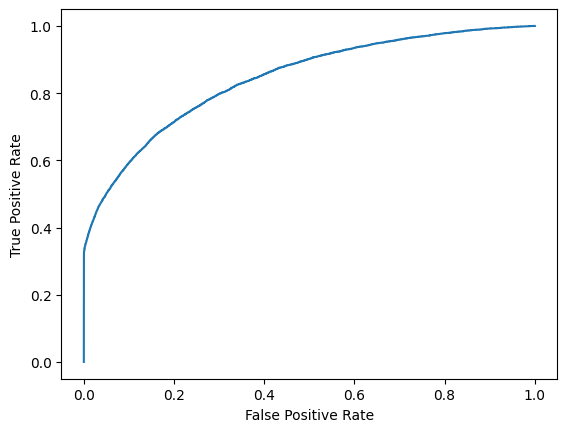

In [147]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [148]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(youdenJ[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.146 with Youden J statistic: 0.5172
FPR: 0.1677, TPR: 0.6849


Melakukan konversi dari probabilitas menjadi target

In [149]:
y_pred_convert = y_pred_rf.copy()

In [150]:
for i in range(0, len(y_pred_convert)):
  if y_pred_convert[i] > thresholdOpt:
    y_pred_convert[i] = 1
  else:
    y_pred_convert[i] = 0

#### Hasil Evaluasi Random Forest

In [151]:
print("Accuracy Random Forest: ", accuracy_score(y_test, y_pred_convert))
print("Precision Random Forest: ", precision_score(y_test, y_pred_convert, average='macro'))
print("Recall Random Forest: ",recall_score(y_test, y_pred_convert, average='macro'))

Accuracy Random Forest:  0.8118765990581779
Precision Random Forest:  0.6691017079372527
Recall Random Forest:  0.7585519153490154


In [154]:
score = roc_auc_score(y_test, y_pred_convert)

print(f"ROC AUC Random Forest: {score}")

ROC AUC Random Forest: 0.7585519153490154


In [155]:
f1_rf = f1_score(y_test, y_pred_convert)
print(f"F1 Score Random Forest: {f1_rf}")

F1 Score Random Forest: 0.5013514177600865


In [156]:
# Confusion Matrix Random Forest
print("Cofusion Matrix Random Forest: \n", confusion_matrix(y_test, y_pred_convert))

Cofusion Matrix Random Forest: 
 [[38690  7800]
 [ 2347  5101]]


### Gradient Boosting

In [157]:
y_pred_gb = gb_model.predict_proba(X_test.values)[::,1]

Menggunakan Threshold berdasarkan ROC AUC karena data yang imbalance

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

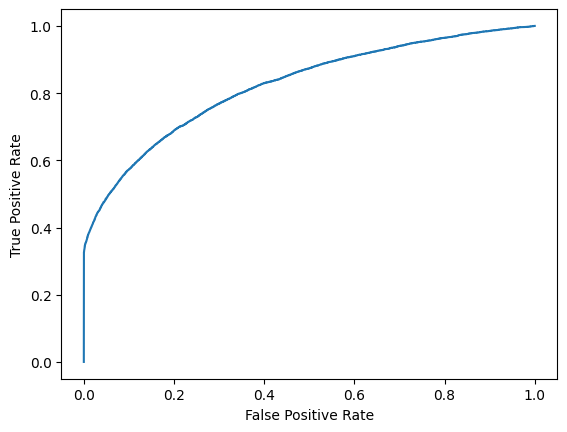

In [159]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(youdenJ[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.0129 with Youden J statistic: 0.4901
FPR: 0.1779, TPR: 0.668


Melakukan konversi dari probabilitas menjadi target

In [161]:
y_pred_convert = y_pred_gb.copy()

In [162]:
for i in range(0, len(y_pred_convert)):
  if y_pred_convert[i] > thresholdOpt:
    y_pred_convert[i] = 1
  else:
    y_pred_convert[i] = 0

#### Hasil Evaluasi Gradient Boosting

In [163]:
print("Accuracy Gradient Boosting: ", accuracy_score(y_test, y_pred_convert))
print("Precision Gradient Boosting: ", precision_score(y_test, y_pred_convert, average='macro'))
print("Recall Gradient Boosting: ",recall_score(y_test, y_pred_convert, average='macro'))

Accuracy Gradient Boosting:  0.8008824947161556
Precision Gradient Boosting:  0.6574250825837168
Recall Gradient Boosting:  0.7449579290003578


In [164]:
score = roc_auc_score(y_test, y_pred_convert)

print(f"ROC AUC Gradient Boosting: {score}")

ROC AUC Gradient Boosting: 0.7449579290003578


In [165]:
f1_rf = f1_score(y_test, y_pred_convert)
print(f"F1 Score Gradient Boosting: {f1_rf}")

F1 Score Gradient Boosting: 0.4808082761287827


In [166]:
# Confusion Matrix Gradient Boosting
print("Cofusion Matrix Gradient Boosting: \n", confusion_matrix(y_test, y_pred_convert))

Cofusion Matrix Gradient Boosting: 
 [[38225  8265]
 [ 2475  4973]]
